In [533]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [534]:
data = load_boston()
data.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## ***Etapa 1: Entender los Datos***

Para ejecutar cualquier modelo de machine Learning se debe comprender las caracteristicas del Data Set a usar para el modelo, esto es vital para evitar basura en los datos como puede ser datos nulos, datos de un tipo diferente a los demas de la columna y valores atipicos etc.

Ademas es vital conocer las medidad de tendencia central y las medidas de dispecion del Data Set con el fin de corregirlas en caso de exisitir o bien ignorarlas

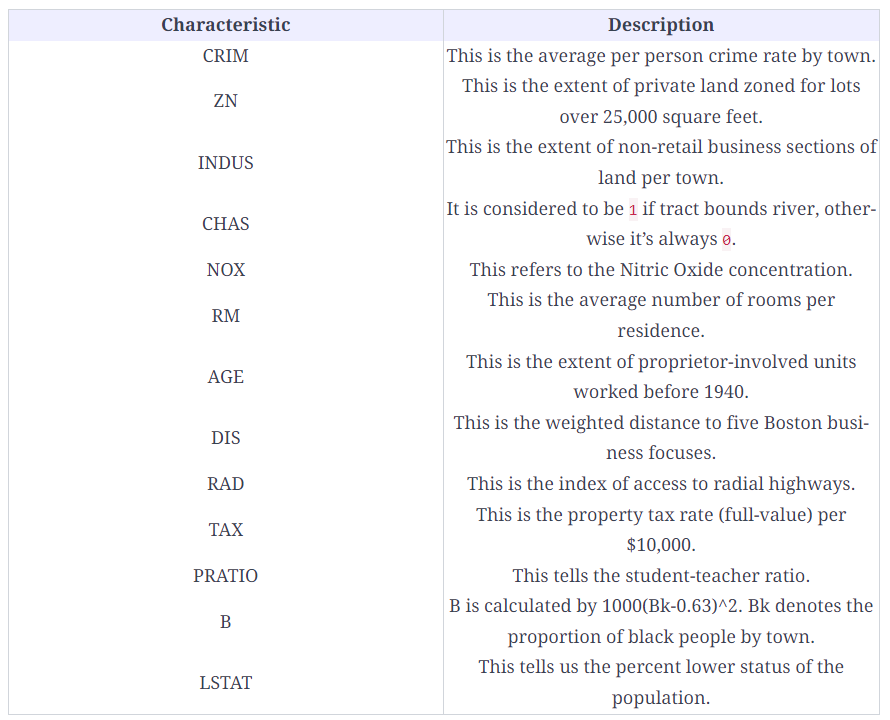

In [535]:
Data = pd.DataFrame(data['data'],columns=data['feature_names'])
# Se crea un Data Frame a partir del diccionario, para ello primero se obtienen los datos y a cada nueva columna de dato se le asigna el nombre de las feature_names

Data['Median House Value ($1000)']=data['target']
# Al Data Frame Creado se le agrega un nueva columna que contiene el valor medio de la vivienda en miles de $USD

Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median House Value ($1000)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [536]:
Data.info()
# De este modo puedo ver si hay datos faltantes y tambien el tipo de dato de cada una de las features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CRIM                        506 non-null    float64
 1   ZN                          506 non-null    float64
 2   INDUS                       506 non-null    float64
 3   CHAS                        506 non-null    float64
 4   NOX                         506 non-null    float64
 5   RM                          506 non-null    float64
 6   AGE                         506 non-null    float64
 7   DIS                         506 non-null    float64
 8   RAD                         506 non-null    float64
 9   TAX                         506 non-null    float64
 10  PTRATIO                     506 non-null    float64
 11  B                           506 non-null    float64
 12  LSTAT                       506 non-null    float64
 13  Median House Value ($1000)  506 non

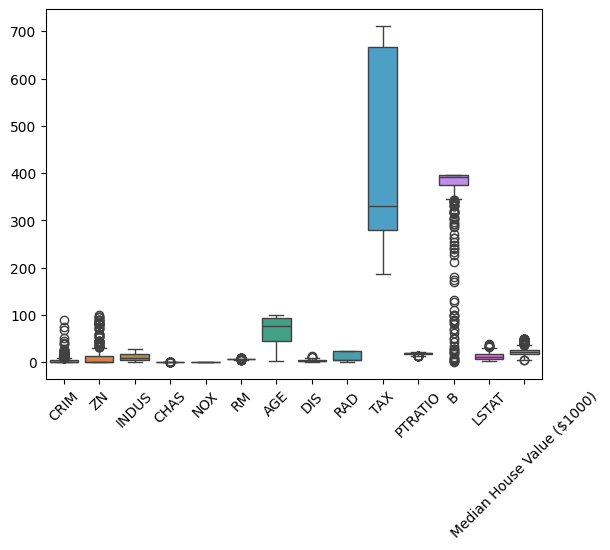

In [537]:
ax = sns.boxplot(Data[0:])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()
# Al ver el boxplot los datos tienen un comportamiento bastante anormal, pues muestra datos con valores muy diferentes entre si y muchos valores atipicos
# por lo que se opta por hacer una transformacion de estos valores usando un escalado de los datos

## ***Etapa 2: Preprocesar Datos***

En esta seccion se limpia la base de datos par tener consistencia entre los datos en este caso se optara por eliminar las filas correspondientes a los datos atipicos y hacer un re-escalado de los datos para que todos esten en valores similares

In [538]:
limite_inferior = np.percentile(Data['CRIM'],25)
limite_superior = np.percentile(Data['CRIM'],75)
rango = limite_superior-limite_inferior
Atipico_bajo = limite_inferior - (1.5*rango)
Atipico_alto = limite_superior + (1.5*rango)
Data = Data.drop(Data[Data['CRIM']>Atipico_alto].index)
Data = Data.drop(Data[Data['CRIM']<Atipico_bajo].index)

### ***Standard Scaler***

In [539]:
scaler_std = StandardScaler()
scaler_std.fit(Data)
Data_scaled = scaler_std.transform(Data)

In [540]:
Data_scaled_1 = Data_scaled[:,0:13]
Data_scled_df_std = pd.DataFrame(Data_scaled_1,columns=[data['feature_names']])
Data_scled_df_std['Median House Value ($1000)']=Data_scaled[:,13]

In [541]:
Data_scled_df_std.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median House Value ($1000)
0,-0.560759,0.201003,-1.151786,-0.293972,0.014724,0.340189,0.016925,-0.006614,-0.893676,-0.506019,-1.313435,0.394670,-1.036011,0.003735
1,-0.550885,-0.532612,-0.447302,-0.293972,-0.602449,0.111018,0.506245,0.414458,-0.753641,-0.877421,-0.178762,0.394670,-0.343235,-0.274039
2,-0.550894,-0.532612,-0.447302,-0.293972,-0.602449,1.247946,-0.129514,0.414458,-0.753641,-0.877421,-0.178762,0.332515,-1.194217,1.242144
3,-0.548505,-0.532612,-1.171027,-0.293972,-0.700838,0.969666,-0.675981,0.940187,-0.613607,-1.014978,0.229720,0.360004,-1.375737,1.091683
4,-0.531249,-0.532612,-1.171027,-0.293972,-0.700838,1.191397,-0.375960,0.940187,-0.613607,-1.014978,0.229720,0.394670,-0.977724,1.415753


### ***Min-Max Scaler***

In [542]:
scaler_minMax = MinMaxScaler()
scaler_minMax.fit(Data)
Data_scaled = scaler_minMax.transform(Data)


In [543]:
Data_scaled_1 = Data_scaled[:,0:13]
Data_scled_df_minMax = pd.DataFrame(Data_scaled_1,columns=[data['feature_names']])
Data_scled_df_minMax['Median House Value ($1000)']=Data_scaled[:,13]

In [544]:
Data_scled_df_minMax.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median House Value ($1000)
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.099449,0.395349
1,0.002338,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.226744,0.339535
2,0.002336,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.070379,0.644186
3,0.002902,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.037026,0.613953
4,0.006988,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.110159,0.679070


### ***Nomalizer Scaler***

In [545]:
scaler_norm = Normalizer()
scaler_norm.fit(Data)
Data_scaled = scaler_norm.transform(Data)


In [546]:
Data_scaled_1 = Data_scaled[:,0:13]
Data_scled_df_norm = pd.DataFrame(Data_scaled_1,columns=[data['feature_names']])
Data_scled_df_norm['Median House Value ($1000)']=Data_scaled[:,13]

In [547]:
Data_scled_df_norm.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median House Value ($1000)
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707


### ***Robust Scaler***

In [548]:
scaler_Robust = RobustScaler()
scaler_Robust.fit(Data)
Data_scaled = scaler_Robust.transform(Data)


In [549]:
Data_scaled_1 = Data_scaled[:,0:13]
Data_scled_df_Robust = pd.DataFrame(Data_scaled_1,columns=[data['feature_names']])
Data_scled_df_Robust['Median House Value ($1000)']=Data_scaled[:,13]

In [550]:
Data_scled_df_Robust.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median House Value ($1000)
0,-0.190737,0.9,-0.440332,0.0,0.164286,0.489437,-0.102767,0.146137,-2.0,-0.086614,-0.916667,0.261776,-0.632741,0.250784
1,-0.167203,0.0,-0.080816,0.0,-0.328571,0.272535,0.167984,0.438711,-1.5,-0.511811,-0.222222,0.261776,-0.122624,-0.050157
2,-0.167226,0.0,-0.080816,0.0,-0.328571,1.348592,-0.183794,0.438711,-1.5,-0.511811,-0.222222,0.035570,-0.749234,1.592476
3,-0.161530,0.0,-0.450151,0.0,-0.407143,1.085211,-0.486166,0.804003,-1.0,-0.669291,0.027778,0.135612,-0.882894,1.429467
4,-0.120405,0.0,-0.450151,0.0,-0.407143,1.295070,-0.320158,0.804003,-1.0,-0.669291,0.027778,0.261776,-0.589822,1.780564


### ***Resumen Graficas Scaler***

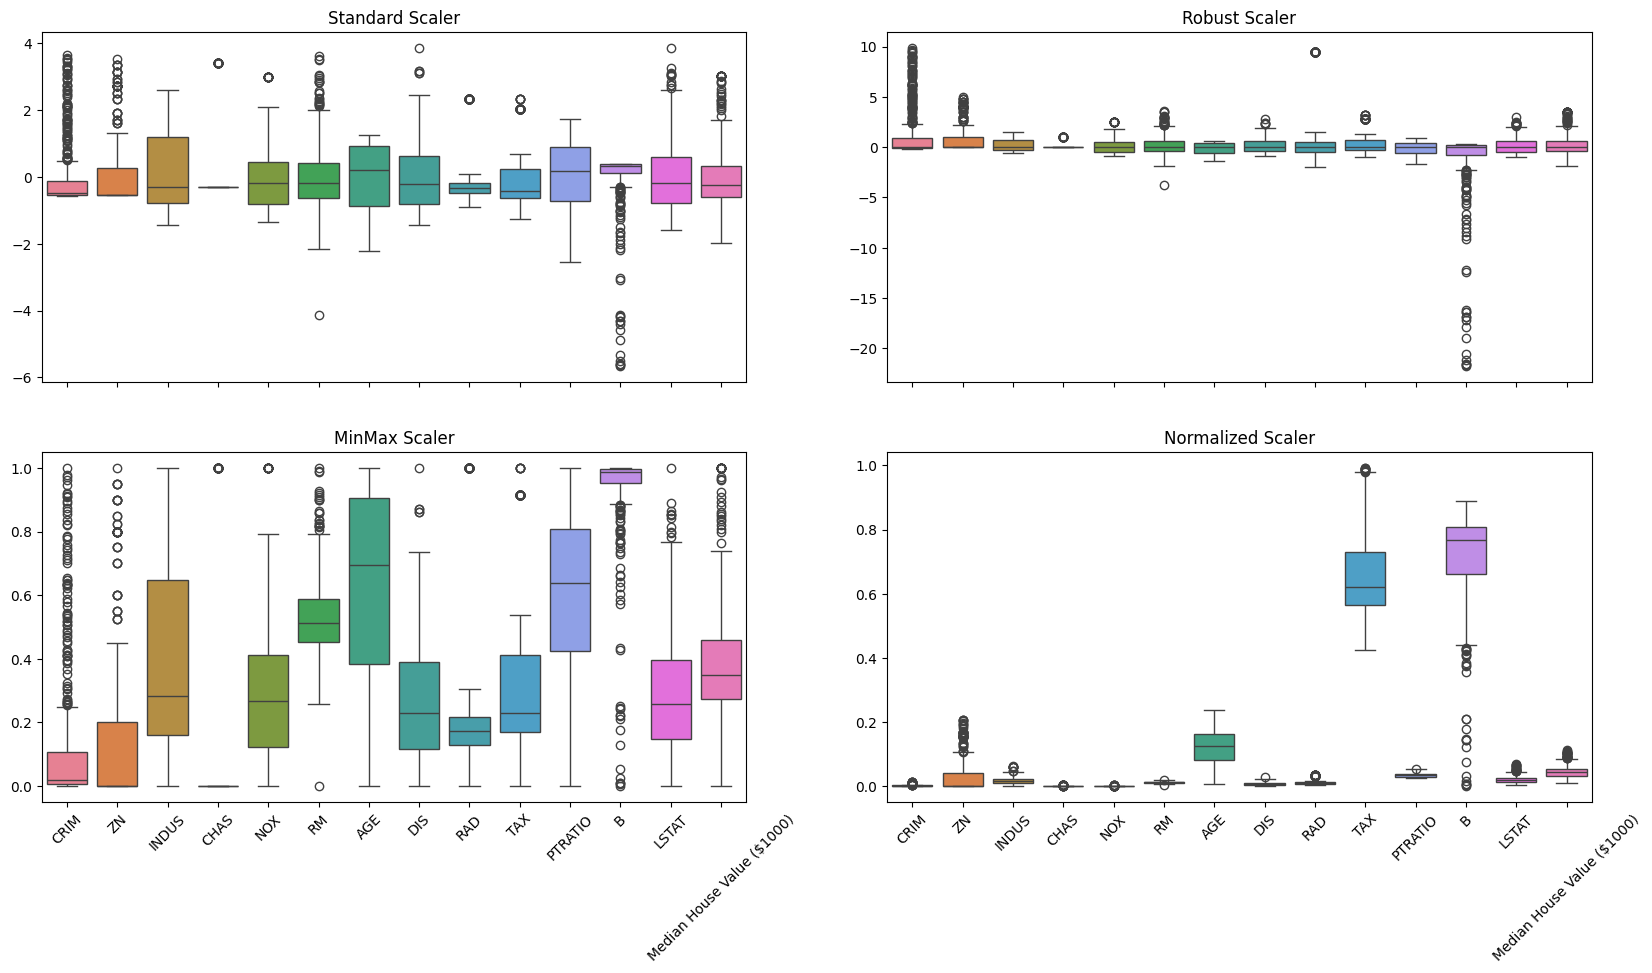

In [551]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2,sharex=True,figsize=(20, 10))

plt.subplot(2,2,1)
ax1 = sns.boxplot(Data_scled_df_std[0:])
ax1.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Standard Scaler')

plt.subplot(2,2,2)
ax2 = sns.boxplot(Data_scled_df_Robust[0:])
ax2.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Robust Scaler')

plt.subplot(2,2,3)
ax3 = sns.boxplot(Data_scled_df_minMax[0:])
ax3.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('MinMax Scaler')

plt.subplot(2,2,4)
sns.boxplot(Data_scled_df_norm[0:])
ax4.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Normalized Scaler')

plt.show()


## ***Etapa 3: Modelado de los Datos***

Para el modelado de datos se usara una regresion Lineal, Rigde y Lasso, comparando el desempeño de cada una y viendo cual tiene un mejor comportamiento antes y despues de la reduccion de dimensionalidad usando PCA

Segun  lo visto en la etapa 2 y comparando los boxplot  del comportamiento de la data escalada se opta por usar los datos escalados del Standard Scaler y MinMax Scaler 


### ***Linear Regression***

#### Comparando Data No-Transformada

In [552]:
X = Data.iloc[:,0:13]
y = Data.iloc[:,13]
X_train_lr, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [553]:
lr = LinearRegression().fit(X_train_lr, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_lr, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
Lineal = lr.score(X_train_lr, y_train)

Training set score: 0.75
Test set score: 0.73


In [554]:
pca = PCA(n_components=10)
pca.fit(X_train_lr)
X_pca = pca.transform(X_train_lr)
test_PCA = pca.transform(X_test)
lr_PCA = LinearRegression().fit(X_pca, y_train)
print("Training set score: {:.2f}".format(lr_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(lr_PCA.score(test_PCA, y_test)))
Lineal_PCA = lr_PCA.score(X_pca, y_train)

Training set score: 0.65
Test set score: 0.64


#### Comparando Data-Standard Scaler

In [555]:
X = Data_scled_df_std.iloc[:,0:13]
y = Data_scled_df_std.iloc[:,13]
X_train_lr_std, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [556]:
lr = LinearRegression().fit(X_train_lr_std, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_lr_std, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
Lineal_std = lr.score(X_train_lr_std, y_train)

Training set score: 0.75
Test set score: 0.73


In [557]:
pca = PCA(n_components=10)
pca.fit(X_train_lr_std)
X_pca = pca.transform(X_train_lr_std)
test_PCA = pca.transform(X_test)
lr_PCA = LinearRegression().fit(X_pca, y_train)
print("Training set score: {:.2f}".format(lr_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(lr_PCA.score(test_PCA, y_test)))
Lineal_std_PCA = lr_PCA.score(X_pca, y_train)

Training set score: 0.74
Test set score: 0.70


#### Comparando Data-minMax Sacler


In [558]:
X = Data_scled_df_minMax.iloc[:,0:13]
y = Data_scled_df_minMax.iloc[:,13]
X_train_lr_mM, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [559]:
lr = LinearRegression().fit(X_train_lr_mM, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_lr_mM, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
Lineal_mM = lr.score(X_train_lr_mM, y_train)

Training set score: 0.75
Test set score: 0.73


In [560]:
pca = PCA(n_components=10)
pca.fit(X_train_lr_mM)
X_pca = pca.transform(X_train_lr_mM)
test_PCA = pca.transform(X_test)
lr_PCA = LinearRegression().fit(X_pca, y_train)
print("Training set score: {:.2f}".format(lr_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(lr_PCA.score(test_PCA, y_test)))
Lineal_mM_PCA = lr_PCA.score(X_pca, y_train)

Training set score: 0.72
Test set score: 0.68


### ***Ridge Regression***

#### Comparando Data No-Transformada

In [561]:
X = Data.iloc[:,0:13]
y = Data.iloc[:,13]
X_train_rdg, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [562]:
Ridge_reg = Ridge(alpha=0.01).fit(X_train_rdg, y_train)
print("Training set score: {:.2f}".format(Ridge_reg.score(X_train_rdg, y_train)))
print("Test set score: {:.2f}".format(Ridge_reg.score(X_test, y_test)))
rd = Ridge_reg.score(X_train_rdg, y_train)

Training set score: 0.75
Test set score: 0.73


In [563]:
pca = PCA(n_components=10)
pca.fit(X_train_rdg)
X_pca = pca.transform(X_train_rdg)
test_PCA = pca.transform(X_test)
Ridge_PCA = Ridge(alpha=0.01).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Ridge_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Ridge_PCA.score(test_PCA, y_test)))
rd_pca = Ridge_PCA.score(X_pca, y_train)

Training set score: 0.65
Test set score: 0.64


#### Comparando Data-Standard Scaler

In [564]:
X = Data_scled_df_std.iloc[:,0:13]
y = Data_scled_df_std.iloc[:,13]
X_train_rdg_std, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [565]:
Ridge_reg = Ridge(alpha=0.01).fit(X_train_rdg_std, y_train)
print("Training set score: {:.2f}".format(Ridge_reg.score(X_train_rdg_std, y_train)))
print("Test set score: {:.2f}".format(Ridge_reg.score(X_test, y_test)))
rd_std = Ridge_reg.score(X_train_rdg_std, y_train)

Training set score: 0.75
Test set score: 0.73


In [566]:
pca = PCA(n_components=10)
pca.fit(X_train_rdg_std)
X_pca = pca.transform(X_train_rdg_std)
test_PCA = pca.transform(X_test)
Ridge_PCA = Ridge(alpha=0.01).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Ridge_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Ridge_PCA.score(test_PCA, y_test)))
rd_std_pca = Ridge_PCA.score(X_pca, y_train)

Training set score: 0.74
Test set score: 0.70


#### Comparando Data-minMax Sacler


In [567]:
X = Data_scled_df_minMax.iloc[:,0:13]
y = Data_scled_df_minMax.iloc[:,13]
X_train_rdg_mM, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [568]:
Ridge_reg = Ridge(alpha=0.01).fit(X_train_rdg_mM, y_train)
print("Training set score: {:.2f}".format(Ridge_reg.score(X_train_rdg_mM, y_train)))
print("Test set score: {:.2f}".format(Ridge_reg.score(X_test, y_test)))
rd_mM = Ridge_reg.score(X_train_rdg_mM, y_train)

Training set score: 0.75
Test set score: 0.73


In [569]:
pca = PCA(n_components=10)
pca.fit(X_train_rdg_mM)
X_pca = pca.transform(X_train_rdg_mM)
test_PCA = pca.transform(X_test)
Ridge_PCA = Ridge(alpha=0.01).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Ridge_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Ridge_PCA.score(test_PCA, y_test)))
rd_mM_pca = Ridge_PCA.score(X_pca, y_train)

Training set score: 0.72
Test set score: 0.68


### ***Lasso Regression***

#### Comparando Data No-Transformada

In [570]:
X = Data.iloc[:,0:13]
y = Data.iloc[:,13]
X_train_Lasso, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [571]:
Lasso_reg = Lasso(alpha=0.01, max_iter=100000).fit(X_train_Lasso, y_train)
print("Training set score: {:.2f}".format(Lasso_reg.score(X_train_Lasso, y_train)))
print("Test set score: {:.2f}".format(Lasso_reg.score(X_test, y_test)))
Lss = Lasso_reg.score(X_train_Lasso, y_train)

Training set score: 0.75
Test set score: 0.73


In [572]:
pca = PCA(n_components=10)
pca.fit(X_train_Lasso)
X_pca = pca.transform(X_train_Lasso)
test_PCA = pca.transform(X_test)
Lasso_PCA = Lasso(alpha=0.01, max_iter=100000).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Lasso_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Lasso_PCA.score(test_PCA, y_test)))
Lss_pca = Lasso_PCA.score(X_pca, y_train)

Training set score: 0.65
Test set score: 0.64


#### Comparando Data-Standard Scaler

In [573]:
X = Data_scled_df_std.iloc[:,0:13]
y = Data_scled_df_std.iloc[:,13]
X_train_Lasso_std, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [574]:
Lasso_reg = Lasso(alpha=0.01, max_iter=100000).fit(X_train_Lasso_std, y_train)
print("Training set score: {:.2f}".format(Lasso_reg.score(X_train_Lasso_std, y_train)))
print("Test set score: {:.2f}".format(Lasso_reg.score(X_test, y_test)))
Lss_std = Lasso_reg.score(X_train_Lasso_std, y_train)

Training set score: 0.75
Test set score: 0.72


In [575]:
pca = PCA(n_components=10)
pca.fit(X_train_Lasso_std)
X_pca = pca.transform(X_train_Lasso_std)
test_PCA = pca.transform(X_test)
Lasso_PCA = Lasso(alpha=0.01, max_iter=100000).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Lasso_PCA.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Lasso_PCA.score(test_PCA, y_test)))
Lss_std_pca = Lasso_PCA.score(X_pca, y_train)

Training set score: 0.74
Test set score: 0.70


#### Comparando Data-minMax Sacler


In [576]:
X = Data_scled_df_minMax.iloc[:,0:13]
y = Data_scled_df_minMax.iloc[:,13]
X_train_Lasso_mM, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [577]:
Lasso_reg = Lasso(alpha=0.01, max_iter=100000).fit(X_train_Lasso_mM, y_train)
print("Training set score: {:.2f}".format(Lasso_reg.score(X_train_Lasso_mM, y_train)))
print("Test set score: {:.2f}".format(Lasso_reg.score(X_test, y_test)))
Lss_mM = Lasso_reg.score(X_train_Lasso_mM, y_train)

Training set score: 0.57
Test set score: 0.53


In [578]:
pca = PCA(n_components=12)
pca.fit(X_train_Lasso_mM)
X_pca = pca.transform(X_train_Lasso_mM)
test_PCA = pca.transform(X_test)
Lasso_PCAa = Lasso(alpha=0.01, max_iter=100000).fit(X_pca, y_train)
print("Training set score: {:.2f}".format(Lasso_PCAa.score(X_pca, y_train)))
print("Test set score: {:.2f}".format(Lasso_PCAa.score(test_PCA, y_test)))
Lss_mM_pca = Lasso_PCAa.score(X_pca, y_train)

Training set score: 0.52
Test set score: 0.48


### ***Grafica Scores***


In [581]:

params = [Lineal,Lineal_PCA,Lineal_std,Lineal_std_PCA,Lineal_mM,Lineal_mM_PCA,
          rd,rd_pca,rd_std,rd_std_pca,rd_mM,rd_mM_pca,
          Lss,Lss_pca,Lss_std,Lss_std_pca,Lss_mM,Lss_mM_pca]
columnas = ['Lineal','Lineal_PCA','Lineal_std','Lineal_std_PCA','Lineal_mM','Lineal_mM_PCA',
          'rd','rd_pca','rd_std','rd_std_pca','rd_mM','rd_mM_pca',
          'Lss','Lss_pca','Lss_std','Lss_std_pca','Lss_mM','Lss_mM_pca']

18

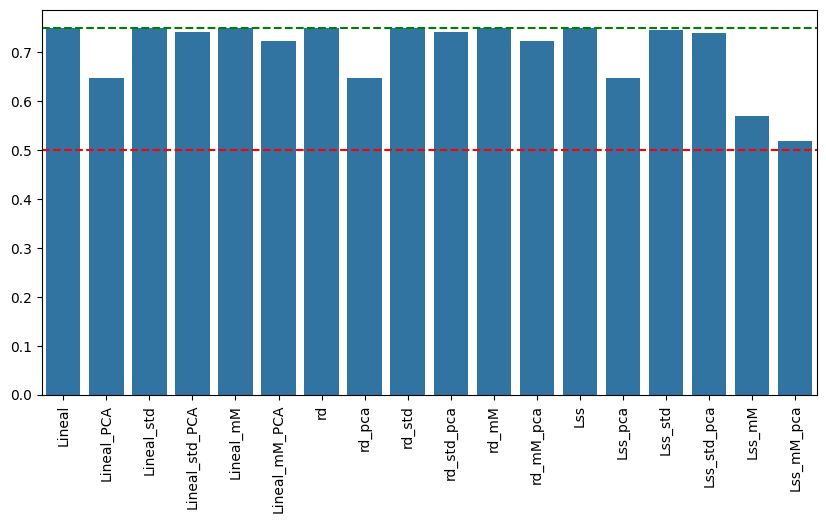

In [580]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x =columnas,y=params)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.axhline(y=0.5,color='red',linestyle='--')
plt.axhline(y=0.75,color='green',linestyle='--')
plt.show()

## ***Etapa 4: Conclusiones***

Despues de probar 18 combinaciones de los 3 modelos (lineal,lasso y Ridge) junto con dos escaladas diferentes(Standard, MinMax) y aplicar PCA se obtuvieron los siguiernes resultados:

* El PCA para este set de Datos no implica una mejora y no es recomendable usarlos, pues al ser un DataSet pequeno y con 13 Features PCA no puede llegar a capturar una variacion considerable a menos que se usen 11, 12 o 13 Features

* Para los 3 timpos de regresion no hubo una diferencia significativa entre usar el Data Set Nomral a usarlo con algun tipo de transformacion (Standard, MinMax), en el modelo lineal normal con STD scaler y MinMax Scaler se ubtuvieron valores de 0.75, comportamiento que se repite para Ridge y Lasso


